In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
train = pd.read_csv("Train_v2.csv")
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
train.drop('uniqueid',axis=1, inplace=True)

In [4]:
train.bank_account = train.bank_account.map({'Yes':1,'No':0})

<AxesSubplot:>

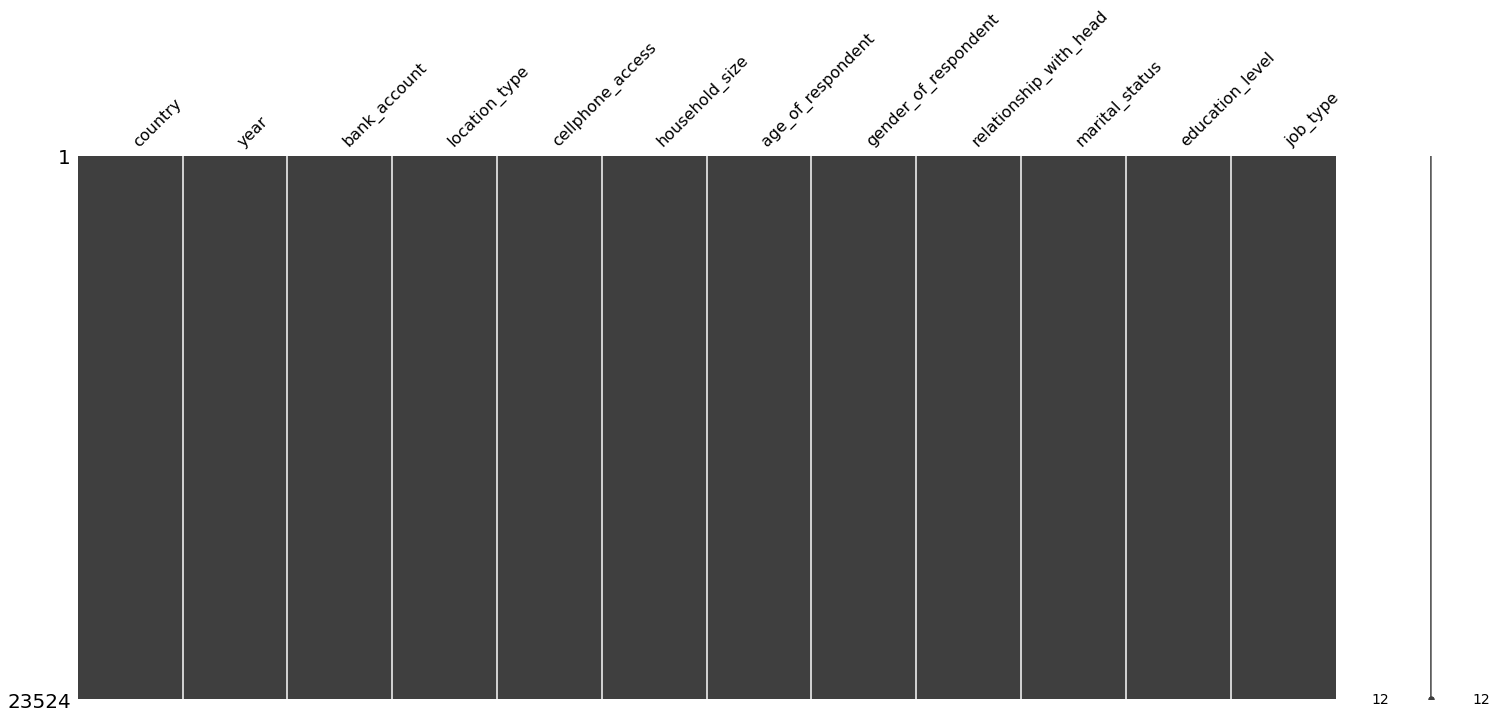

In [8]:
import missingno as mn

mn.matrix(train)

In [9]:
train = pd.get_dummies(train,drop_first=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   year                                             23524 non-null  int64
 1   bank_account                                     23524 non-null  int64
 2   household_size                                   23524 non-null  int64
 3   age_of_respondent                                23524 non-null  int64
 4   country_Rwanda                                   23524 non-null  uint8
 5   country_Tanzania                                 23524 non-null  uint8
 6   country_Uganda                                   23524 non-null  uint8
 7   location_type_Urban                              23524 non-null  uint8
 8   cellphone_access_Yes                             23524 non-null  uint8
 9   gender_of_respondent_Male                        2

In [12]:
X = train.drop('bank_account',axis=1)
y = train.bank_account

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, stratify=y)

In [21]:
pipe_rf = make_pipeline(
    StandardScaler(),
    PCA(n_components=9),
    RandomForestClassifier()
)

pipe_rf.fit(X_train,y_train)
y_pred = pipe_rf.predict(X_test)
test_acc = pipe_rf.score(X_test,y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.875


In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_rf, X=X_train,
y=y_train,
cv=10,
n_jobs=-1)
print(f'CV accuracy scores: {scores}')


CV accuracy scores: [0.89121813 0.8674221  0.88498584 0.87414966 0.86904762 0.88492063
 0.87018141 0.87131519 0.87868481 0.87585034]
